## Функции 

In [ ]:
import numpy as np

def line (k,x,b):
    return k*x+b

def f1(x):
    return np.sin(x) - np.sqrt(3)/2

def f2(x):
    return np.cos(2*np.pi*x) + np.sin(x)**2 - 1/9

def quadratic_equation(x,a,b,c):
    return a*x**2 + b*x + c

def biquadratic_equation(x,a,b,c):
    return  a*x**4 + b*x**2 + c

## Метод 1


In [83]:

def bisection(x_init,x_fin,f,epsilon=1e-6):
    if f(x_init) * f(x_fin) >= 0:
        raise ValueError("На концах интервала одинаковые знаки")
    xinit = x_init
    xfin = x_fin
    while abs(xfin - xinit) > epsilon:
        # середина промежутка
        xmed = (xinit + xfin) / 2
        
        if f(xmed) == 0:
            return xmed
        
        # в какой половине корень
        if f(xinit) * f(xmed) < 0:
            #первая половина с корнем
            xfin = xmed
        else:
            # вторая половина с корнем
            xinit = xmed
    
    # середина конечного интервала
    return (xinit + xfin) / 2
    

### Линейные уравнения

Уравнение: 1x + 3 = 0, корень: x = -3.000
Уравнение: 5x + -10 = 0, корень: x = 2.000
Уравнение: -1x + 0 = 0, корень: x = 0.000


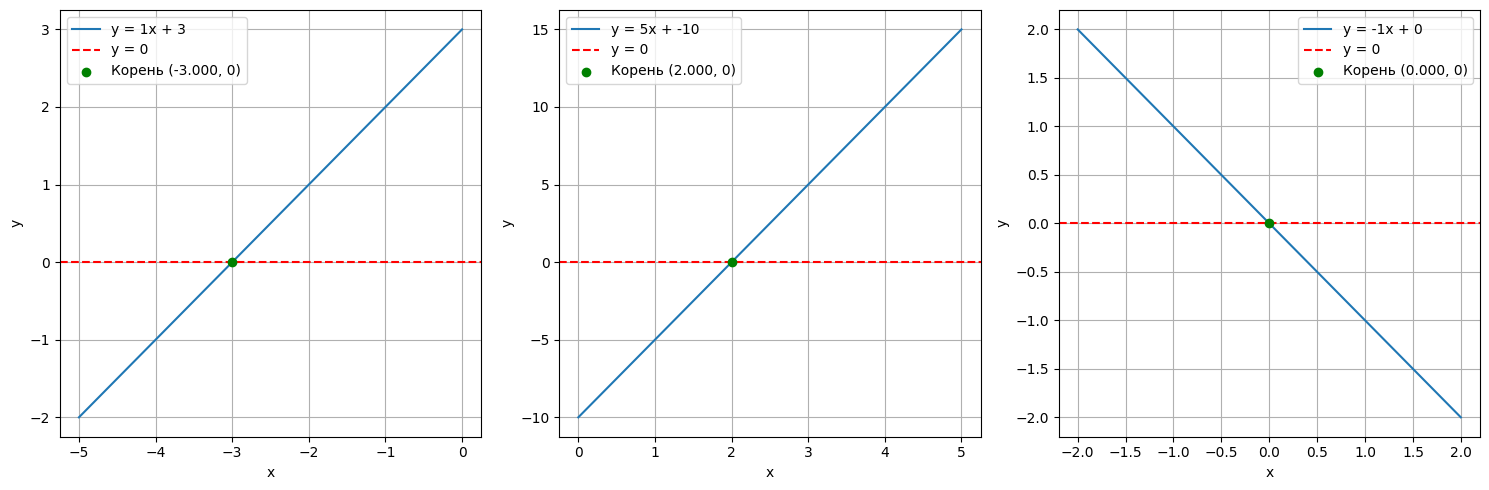

In [ ]:
"""
kx+b=0
(k=1,b=3)
(k=5,b=-10)
(k=-1,b=0)
"""
import matplotlib.pyplot as plt  
equations = [
    {'k': 1, 'b': 3, 'interval': (-5, 0)},   # корень -3
    {'k': 5, 'b': -10, 'interval': (0, 5)},  #  корень 2
    {'k': -1, 'b': 0, 'interval': (-2, 2)}   # -x = 0 корень 0
]

# построение графиков
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, eq in enumerate(equations):
    k, b, interval = eq['k'], eq['b'], eq['interval']
    f = lambda x: line(k, x, b)
    
    # нахождение корня
    try:
        root = bisection(interval[0], interval[1], f)
        print(f"Уравнение: {k}x + {b} = 0, корень: x = {root:.3f}")
    except ValueError as e:
        print(f"Ошибка для уравнения {k}x + {b}: {e}")
        continue
    
    # построение графика
    x_vals = np.linspace(interval[0], interval[1], 1000)
    y_vals = f(x_vals)
    
    ax = axes[idx]
    ax.plot(x_vals, y_vals, label=f'y = {k}x + {b}')
    ax.axhline(0, color='red', linestyle='--', label='y = 0')
    ax.scatter(root, 0, color='green', zorder=5, label=f'Корень ({root:.3f}, 0)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

### Квадратичные и биквадратичные

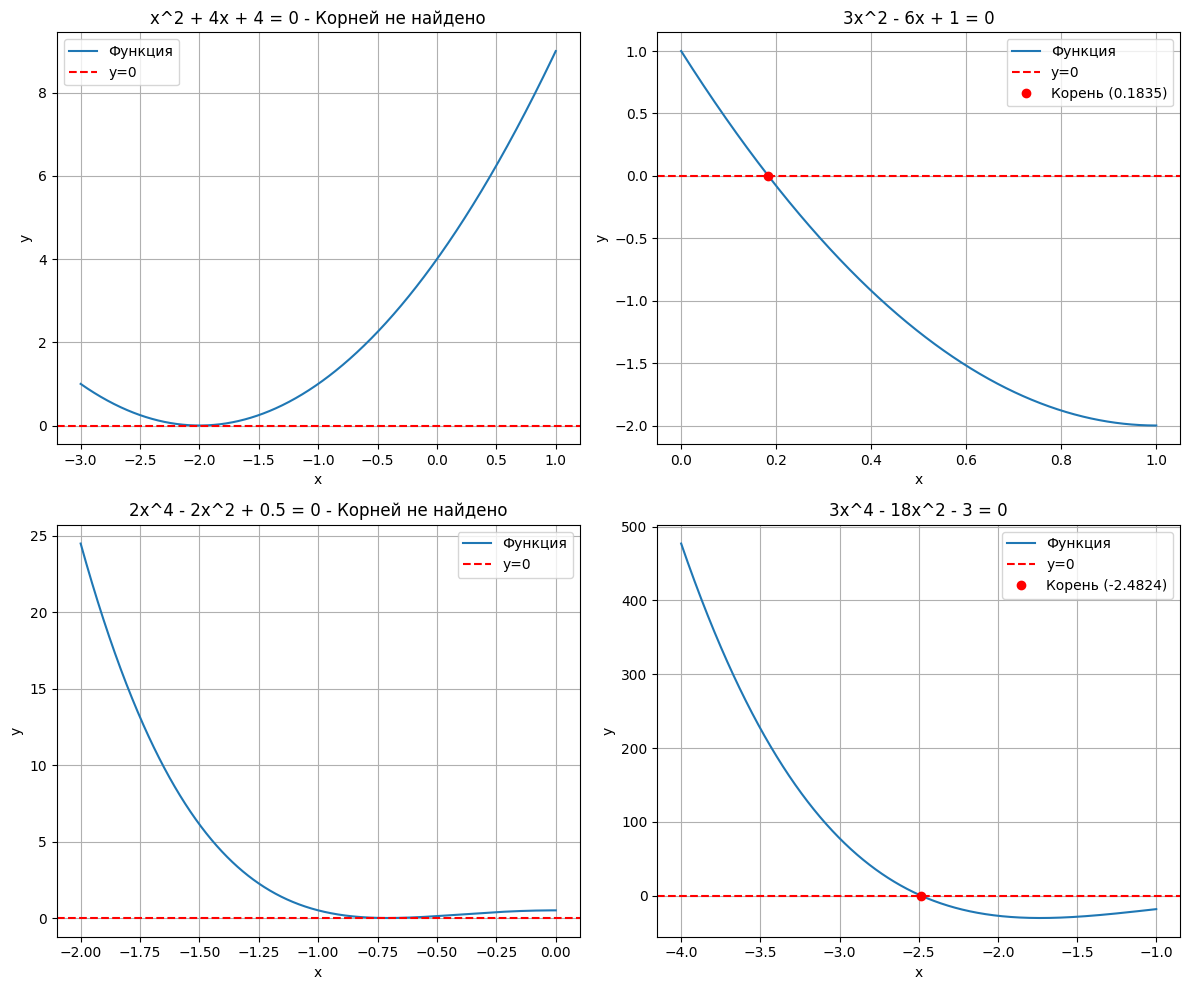

In [85]:
"""
x^2+4x+4=0
3x^2-6x+1=0
2x^4-2x^2+0.5=0
3x^4-18x^2-3=0
"""
# equations = [
#     {"name": "x^2 + 4x + 4 = 0", "func": lambda x: quadratic_equation(x, 1, 4, 4)},
#     {"name": "3x^2 - 6x + 1 = 0", "func": lambda x: quadratic_equation(x, 3, -6, 1)},
#     {"name": "2x^4 - 2x^2 + 0.5 = 0", "func": lambda x: biquadratic_equation(x, 2, -2, 0.5)},
#     {"name": "3x^4 - 18x^2 - 3 = 0", "func": lambda x: biquadratic_equation(x, 3, -18, -3)}
# ]

# x_range = np.linspace(-5, 5, 1000)

# for eq in equations:
#     plt.figure()
#     y = eq["func"](x_range)
#     plt.plot(x_range, y, label=eq["name"])
#     plt.axhline(0, color='red', linestyle='--', label='y=0')
#     plt.xlabel('x')
#     plt.ylabel('y')
#     plt.title(f'График уравнения: {eq["name"]}')
#     plt.legend()
#     plt.grid(True)
#     plt.show()
# уравнения и интервалы
equations = [
    {"func": lambda x: quadratic_equation(x, 1, 4, 4), "interval": (-3, 1), "title": "x^2 + 4x + 4 = 0"},
    {"func": lambda x: quadratic_equation(x, 3, -6, 1), "interval": (0, 1), "title": "3x^2 - 6x + 1 = 0"},
    {"func": lambda x: biquadratic_equation(x, 2, -2, 0.5), "interval": (-2, 0), "title": "2x^4 - 2x^2 + 0.5 = 0"},
    {"func": lambda x: biquadratic_equation(x, 3, -18, -3), "interval": (-4, -1), "title": "3x^4 - 18x^2 - 3 = 0"}
]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, eq in enumerate(equations):
    f = eq["func"]
    a, b = eq["interval"]
    x_vals = np.linspace(a, b, 1000)
    y_vals = f(x_vals)
    
    axs[i].plot(x_vals, y_vals, label="Функция")
    axs[i].axhline(0, color='red', linestyle='--', label="y=0")
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].set_title(eq["title"])
    axs[i].grid(True)
    axs[i].legend()
    
    try:
        root = bisection(a, b, f)
        axs[i].plot(root, 0, 'ro', label=f"Корень ({root:.4f})")
        axs[i].legend()
    except ValueError as e:
        axs[i].set_title(f"{eq['title']} - Корней не найдено")

plt.tight_layout()
plt.show()

### Тригонометрические

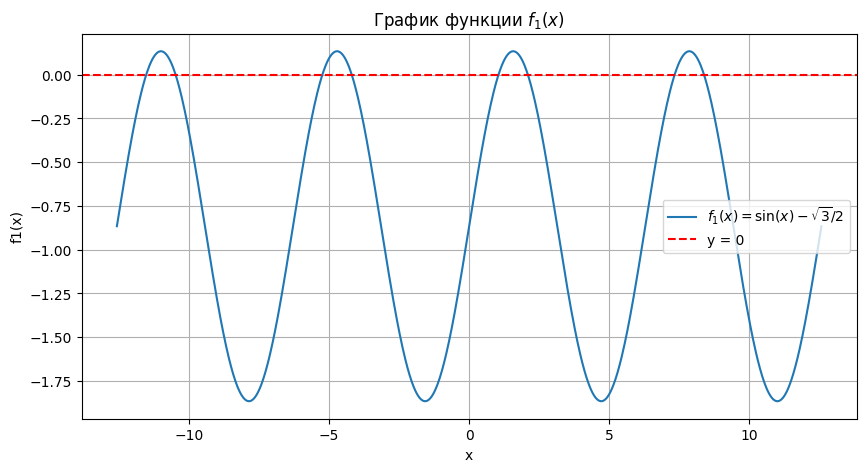

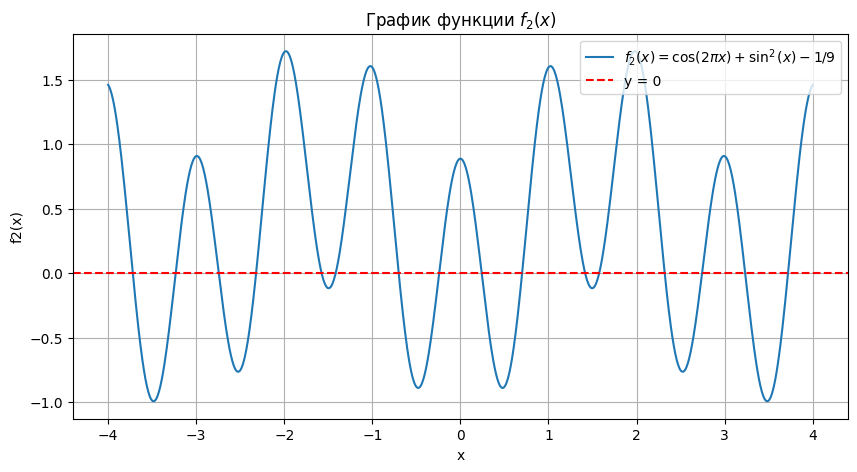

Корень уравнения sin(x)=√3/2 на [-1, 1.5]: 1.047198
Корень уравнения cos(2πx)+sin²(x)=1/9 на [0, 0.5]: 0.241409


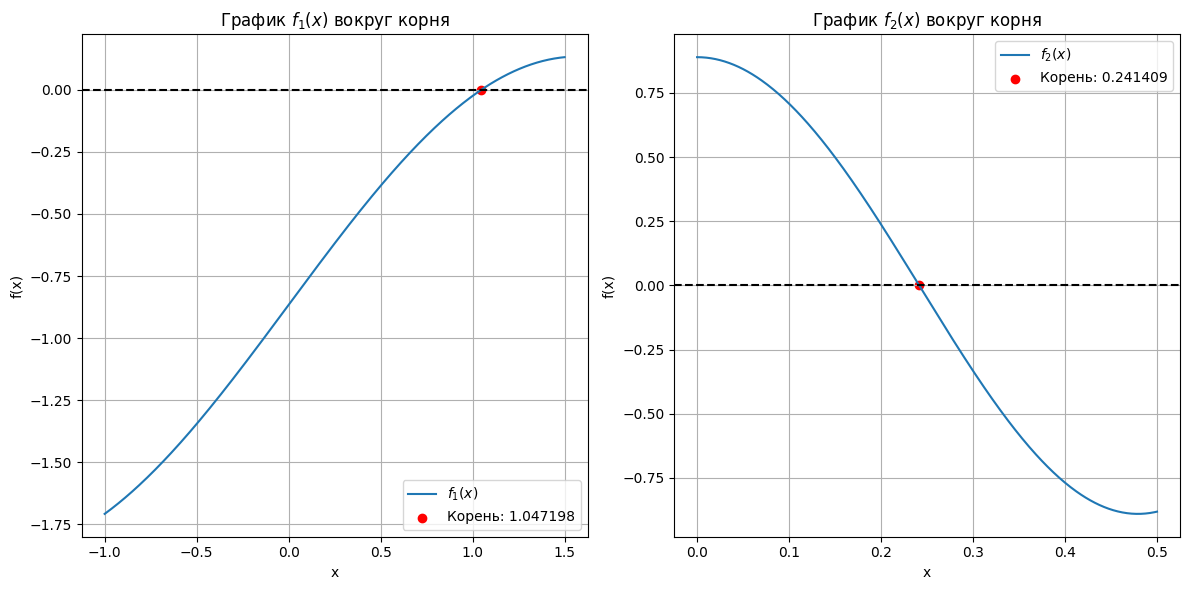

In [ ]:
x = np.linspace(-4*np.pi, 4*np.pi, 1000)
plt.figure(figsize=(10, 5))
plt.plot(x, f1(x), label='$f_1(x) = \sin(x) - \sqrt{3}/2$')
plt.axhline(0, color='red', linestyle='--', label='y = 0')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.title('График функции $f_1(x)$')
plt.legend()
plt.grid(True)
plt.show()

x2 = np.linspace(-4, 4, 1000)
plt.figure(figsize=(10, 5))
plt.plot(x2, f2(x2), label='$f_2(x) = \cos(2\pi x) + \sin^2(x) - 1/9$')
plt.axhline(0, color='red', linestyle='--', label='y = 0')
plt.xlabel('x')
plt.ylabel('f2(x)')
plt.title('График функции $f_2(x)$')
plt.legend()
plt.grid(True)
plt.show()

# нахождение корней
try:
    root1 = bisection(-1, 1.5, f1)  # Интервал для f1
    print(f"Корень уравнения sin(x)=√3/2 на [-1, 1.5]: {root1:.6f}")
except ValueError as e:
    print(f"Ошибка для f1: {e}")

try:
    root2 = bisection(0, 0.5, f2)  # Правильный интервал для f2
    print(f"Корень уравнения cos(2πx)+sin²(x)=1/9 на [0, 0.5]: {root2:.6f}")
except ValueError as e:
    print(f"Ошибка для f2: {e}")

# графики вокруг корней
x1_detail = np.linspace(-1, 1.5, 400)
x2_detail = np.linspace(0, 0.5, 400)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x1_detail, f1(x1_detail), label='$f_1(x)$')
plt.axhline(0, color='black', linestyle='--')
if 'root1' in locals():
    plt.scatter(root1, 0, color='red', label=f'Корень: {root1:.6f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График $f_1(x)$ вокруг корня')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x2_detail, f2(x2_detail), label='$f_2(x)$')
plt.axhline(0, color='black', linestyle='--')
if 'root2' in locals():
    plt.scatter(root2, 0, color='red', label=f'Корень: {root2:.6f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График $f_2(x)$ вокруг корня')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Метод 2

In [ ]:


# численное вычисление производной в точке x
def numerical_derivative(f, x, dx=1e-6):
    return (f(x + dx) - f(x - dx)) / (2 * dx)
# автоподбор тау
def choose_tau(f, x_init):
    
    # вычисляем производную в начальной точке
    df = numerical_derivative(f, x_init)
    
    if abs(df) < 1e-12:  
        return 0.1 
    
    tau = 1 / df

    max_tau = 1e6
    if abs(tau) > max_tau:
        tau = max_tau * (1 if tau > 0 else -1)
        
    return tau

def simple_iteration(f, x_init, epsilon=1e-6, max_iter=10000):

    tau = choose_tau(f, x_init)
    x_prev = x_init
    iterations = 0
    
    for i in range(max_iter):
        iterations += 1
        x_next = x_prev - tau * f(x_prev)
        
        if abs(x_next - x_prev) < epsilon:
            return x_next, iterations, True
            
        x_prev = x_next
        
    return x_prev, iterations, False  # Исправлено: теперь возвращаем три значения

### Линейные уравнения

Уравнение: 1x + 3 = 0, корень: x = -3.000
Уравнение: 5x + -10 = 0, корень: x = 2.000
Уравнение: -1x + 0 = 0, корень: x = -0.000


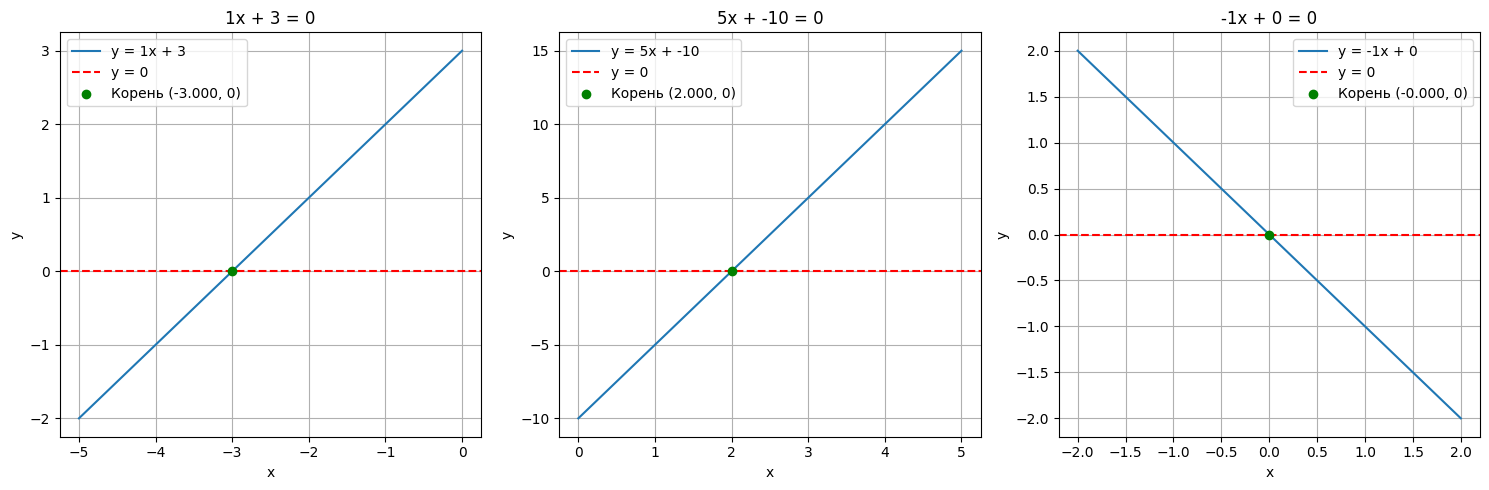

In [ ]:
"""
kx+b=0
(k=1,b=3)
(k=5,b=-10)
(k=-1,b=0)
"""
import matplotlib.pyplot as plt  
equations = [
    {'k': 1, 'b': 3, 'interval': (-5, 0)},   # корень -3
    {'k': 5, 'b': -10, 'interval': (0, 5)},  # корень 2
    {'k': -1, 'b': 0, 'interval': (-2, 2)}   # корень 0
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, eq in enumerate(equations):
    k, b, interval = eq['k'], eq['b'], eq['interval']
    f = lambda x: line(k, x, b)
    
    x_init = -5
    
    try:
        root, _, _ = simple_iteration(f, x_init=x_init)
        print(f"Уравнение: {k}x + {b} = 0, корень: x = {root:.3f}")
    except Exception as e:
        print(f"Ошибка для уравнения {k}x + {b}: {e}")
        continue
    
    x_vals = np.linspace(interval[0], interval[1], 1000)
    y_vals = f(x_vals)
    
    ax = axes[idx]
    ax.plot(x_vals, y_vals, label=f'y = {k}x + {b}')
    ax.axhline(0, color='red', linestyle='--', label='y = 0')
    ax.scatter(root, 0, color='green', zorder=5, label=f'Корень ({root:.3f}, 0)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True)
    ax.set_title(f'{k}x + {b} = 0')

plt.tight_layout()
plt.show()

### Квадратичные и биквадратичные

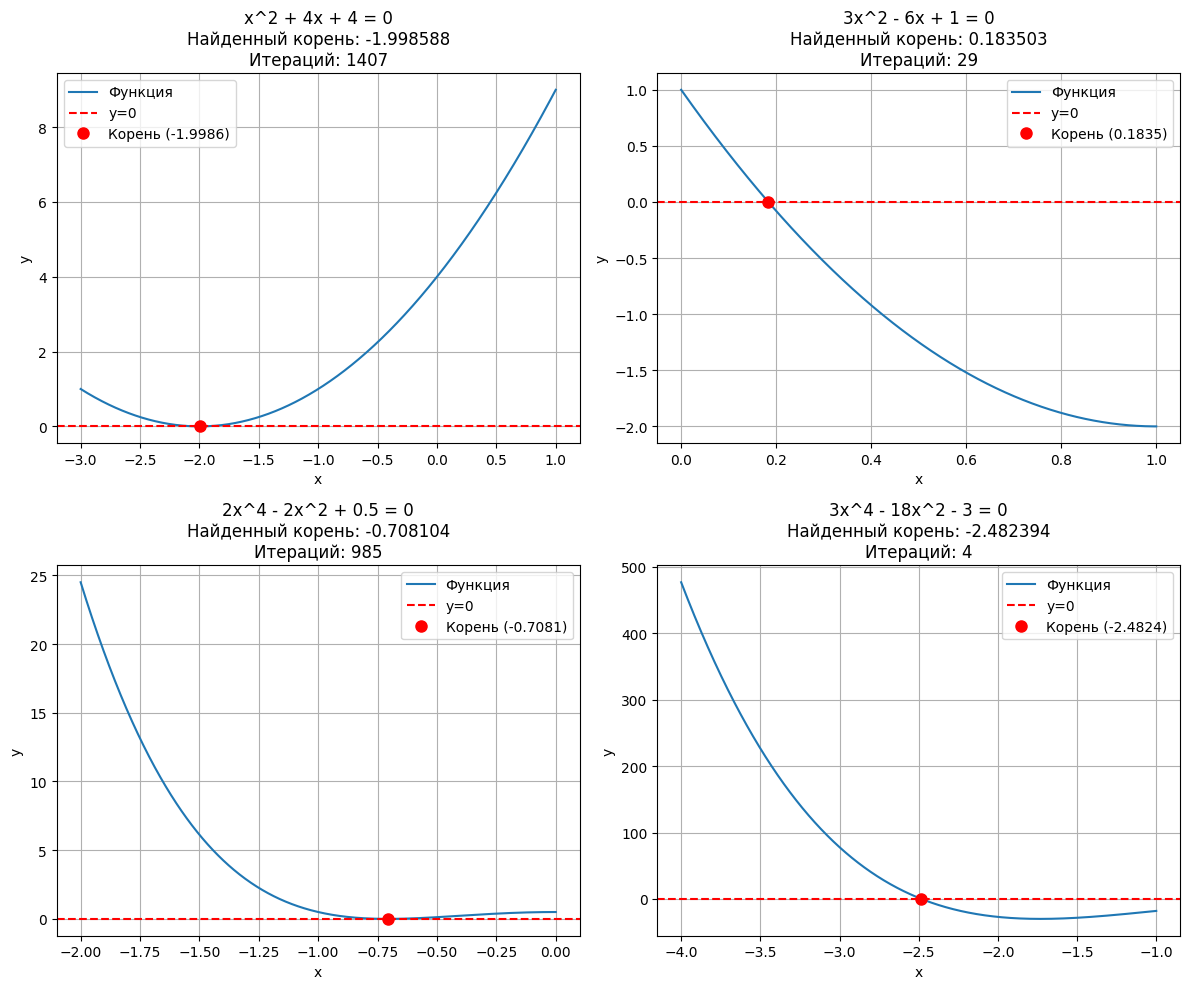

Результаты решения уравнений методом простой итерации:
1. x^2 + 4x + 4 = 0
   Найденный корень: -1.998588
   Количество итераций: 1407
   Значение функции в корне: 1.994891e-06

2. 3x^2 - 6x + 1 = 0
   Найденный корень: 0.183503
   Количество итераций: 29
   Значение функции в корне: 1.428007e-06

3. 2x^4 - 2x^2 + 0.5 = 0
   Найденный корень: -0.708104
   Количество итераций: 985
   Значение функции в корне: 3.986952e-06

4. 3x^4 - 18x^2 - 3 = 0
   Найденный корень: -2.482394
   Количество итераций: 4
   Значение функции в корне: 1.081537e-06



In [ ]:
"""
x^2+4x+4=0
3x^2-6x+1=0
2x^4-2x^2+0.5=0
3x^4-18x^2-3=0
"""
equations = [
    {"func": lambda x: quadratic_equation(x, 1, 4, 4), 
     "interval": (-3, 1), 
     "title": "x^2 + 4x + 4 = 0",
     "type": "quadratic"},
    
    {"func": lambda x: quadratic_equation(x, 3, -6, 1), 
     "interval": (0, 1), 
     "title": "3x^2 - 6x + 1 = 0",
     "type": "quadratic"},
    
    {"func": lambda x: biquadratic_equation(x, 2, -2, 0.5), 
     "interval": (-2, 0), 
     "title": "2x^4 - 2x^2 + 0.5 = 0",
     "type": "biquadratic"},
    
    {"func": lambda x: biquadratic_equation(x, 3, -18, -3), 
     "interval": (-4, -1), 
     "title": "3x^4 - 18x^2 - 3 = 0",
     "type": "biquadratic"}
]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, eq in enumerate(equations):
    f = eq["func"]
    a, b = eq["interval"]
    x_vals = np.linspace(a, b, 1000)
    y_vals = f(x_vals)
    
    # начальное приближение - середина интервала от прошлого
    x_init = (a + b) / 2
    
    root, iterations, converged = simple_iteration(f, x_init)
    
    # построение графика
    axs[i].plot(x_vals, y_vals, label="Функция")
    axs[i].axhline(0, color='red', linestyle='--', label="y=0")
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    
    if converged:
        axs[i].plot(root, 0, 'ro', markersize=8, label=f"Корень ({root:.4f})")
        axs[i].set_title(f"{eq['title']}\nНайденный корень: {root:.6f}\nИтераций: {iterations}")
    else:
        axs[i].set_title(f"{eq['title']} - Не сошлось за {iterations} итераций")
    
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()

print("Результаты решения уравнений методом простой итерации:")
for i, eq in enumerate(equations):
    f = eq["func"]
    a, b = eq["interval"]
    x_init = (a + b) / 2
    
    root, iterations, converged = simple_iteration(f, x_init)
    
    if converged:
        print(f"{i+1}. {eq['title']}")
        print(f"   Найденный корень: {root:.6f}")
        print(f"   Количество итераций: {iterations}")
    else:
        print(f"{i+1}. {eq['title']}")
        print(f"   Метод не сошелся за {iterations} итераций")
    print()

### Тригонометрические

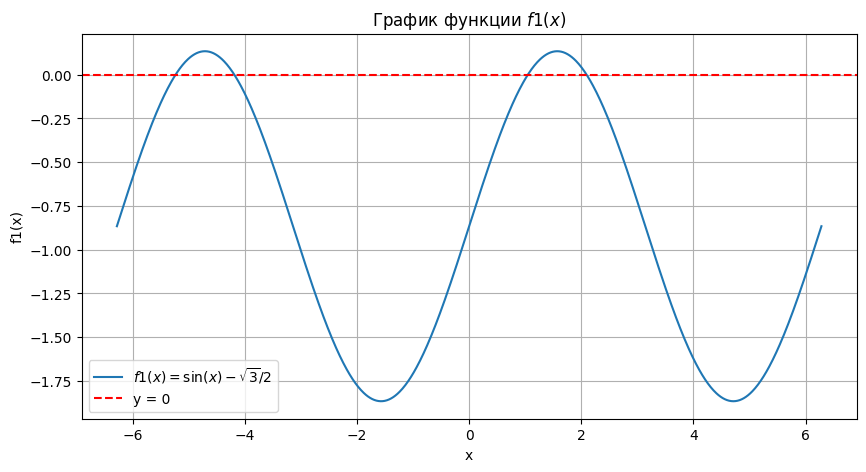

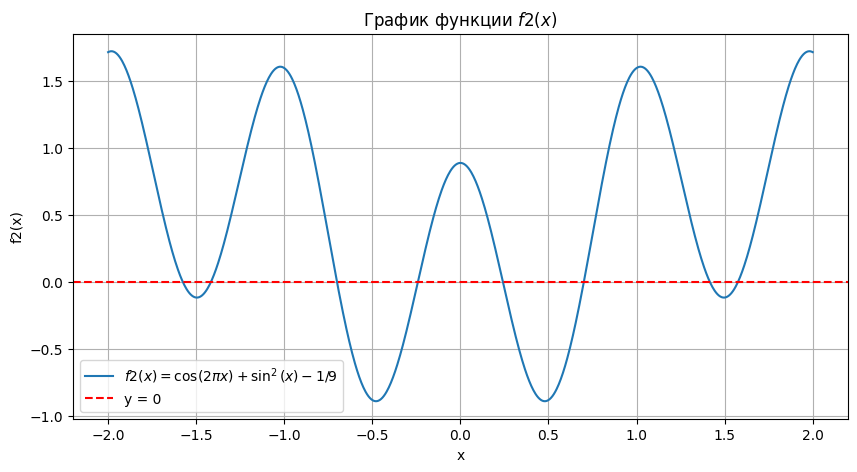

Решение уравнения sin(x) = √3/2:
Корень: 1.047197
Проверка: sin(1.047197) = 0.866025 (ожидается √3/2 ≈ 0.866025)

Решение уравнения cos(2πx) + sin²(x) = 1/9:
Корень: 0.241408
Проверка: cos(2π·0.241408) + sin²(0.241408) = 0.111111 (ожидается 1/9 ≈ 0.111111)



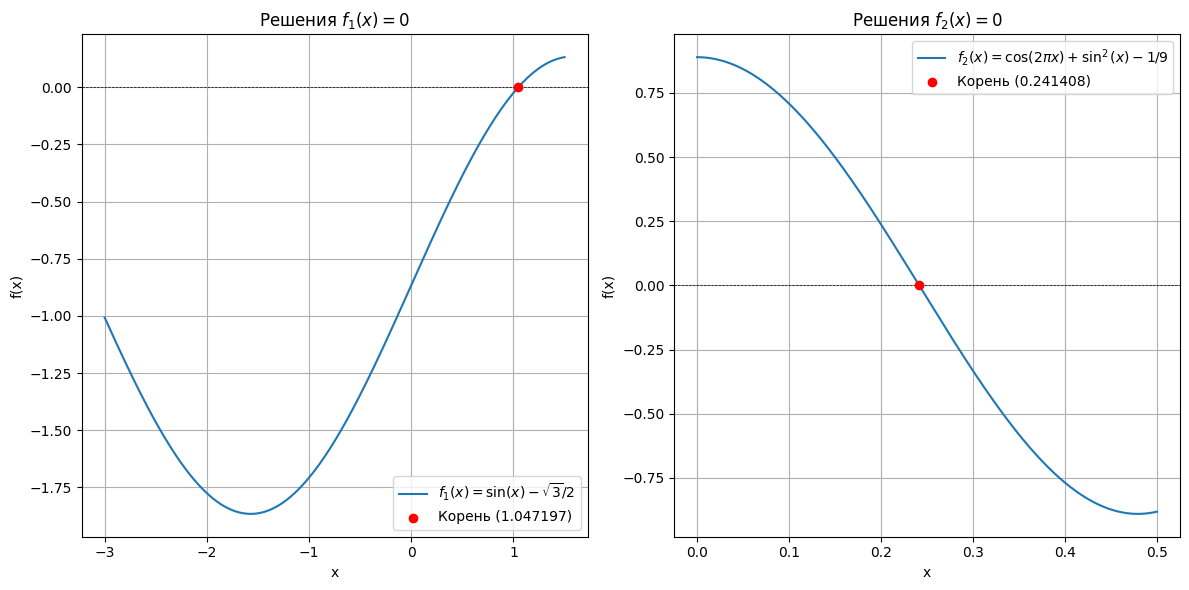

In [106]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y1 = f1(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y1, label='$f1(x) = \sin(x) - \sqrt{3}/2$')
plt.axhline(0, color='red', linestyle='--', label='y = 0')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.title('График функции $f1(x)$')
plt.legend()
plt.grid(True)
plt.show()

x2 = np.linspace(-2, 2, 1000)
y2 = f2(x2)

plt.figure(figsize=(10, 5))
plt.plot(x2, y2, label='$f2(x) = \cos(2\pi x) + \sin^2(x) - 1/9$')
plt.axhline(0, color='red', linestyle='--', label='y = 0')
plt.xlabel('x')
plt.ylabel('f2(x)')
plt.title('График функции $f2(x)$')
plt.legend()
plt.grid(True)
plt.show()

# нахождение корней
print("Решение уравнения sin(x) = √3/2:")
root1, _, _  = simple_iteration(f1, x_init=1.0)
print(f"Корень: {root1:.6f}")
print(f"Проверка: sin({root1:.6f}) = {np.sin(root1):.6f} (ожидается √3/2 ≈ {np.sqrt(3)/2:.6f})")
print()

print("Решение уравнения cos(2πx) + sin²(x) = 1/9:")
root2, _, _ = simple_iteration(f2, x_init=0.2)
print(f"Корень: {root2:.6f}")
val = np.cos(2*np.pi*root2) + np.sin(root2)**2
print(f"Проверка: cos(2π·{root2:.6f}) + sin²({root2:.6f}) = {val:.6f} (ожидается 1/9 ≈ {1/9:.6f})")
print()

x1_plot = np.linspace(-3, 1.5, 400)
x2_plot = np.linspace(0, 0.5, 400)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x1_plot, f1(x1_plot), label='$f_1(x) = \sin(x) - \sqrt{3}/2$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.scatter(root1, 0, color='red', zorder=5, label=f'Корень ({root1:.6f})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Решения $f_1(x) = 0$')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x2_plot, f2(x2_plot), label='$f_2(x) = \cos(2\pi x) + \sin^2(x) - 1/9$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.scatter(root2, 0, color='red', zorder=5, label=f'Корень ({root2:.6f})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Решения $f_2(x) = 0$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Метод 3.1


In [ ]:
def Newton_method(f, x0, tol=1e-6, max_iter=100):

    x = x0
    for n in range(max_iter):
        # численное вычисление производной
        dx = 0.001
        f_prime = (f(x + dx) - f(x - dx)) / (2 * dx)
        
        if abs(f_prime) < 1e-10:
            raise ValueError("Производная близка к нулю. Метод не может продолжаться.")
        
        x_new = x - f(x) / f_prime
        
        if abs(x_new - x) < tol:  # Проверка сходимости
            return x_new, n + 1
        
        x = x_new
    
    raise ValueError(f"Метод не сошелся после {max_iter} итераций")




### Линейные уравнения

Уравнение: 1x + 3 = 0
  Корень: x = -3.000, найдено за 2 итераций
Уравнение: 5x + -10 = 0
  Корень: x = 2.000, найдено за 2 итераций
Уравнение: -1x + 0 = 0
  Корень: x = 0.000, найдено за 2 итераций


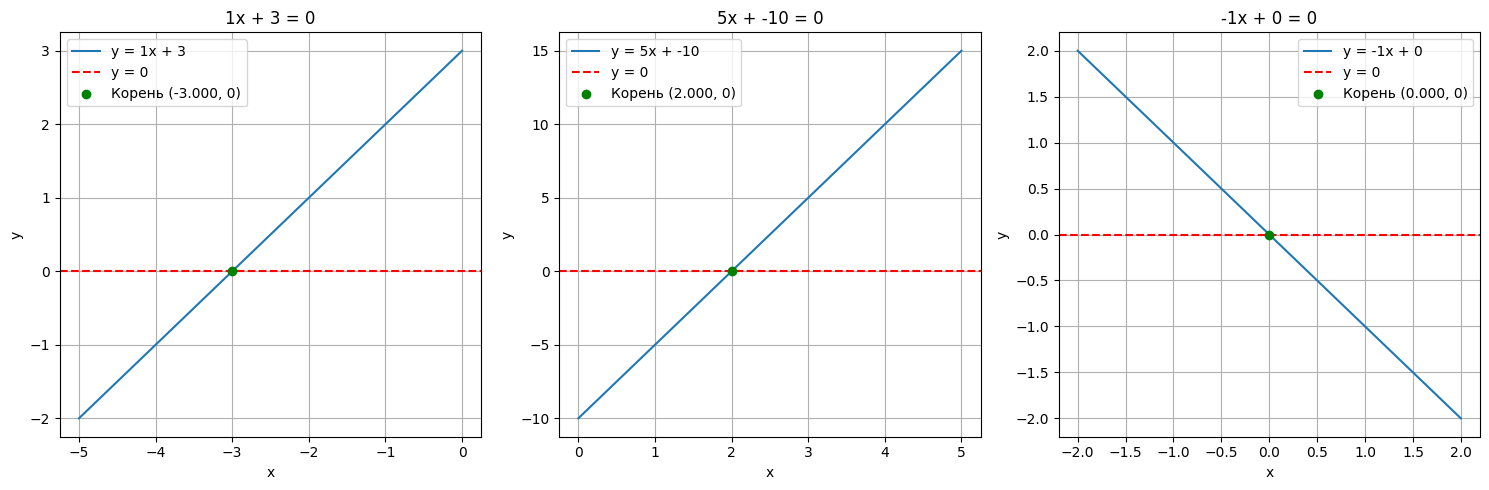

In [ ]:
"""
kx+b=0
(k=1,b=3)
(k=5,b=-10)
(k=-1,b=0)
"""
# параметры уравнений
equations = [
    {'k': 1, 'b': 3, 'interval': (-5, 0)},   # Корень: x = -3
    {'k': 5, 'b': -10, 'interval': (0, 5)},  # Корень: x = 2
    {'k': -1, 'b': 0, 'interval': (-2, 2)}   # Корень: x = 0
]

# построение графиков и решение уравнений
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, eq in enumerate(equations):
    k, b, interval = eq['k'], eq['b'], eq['interval']
    f = lambda x: line(k, x, b)
    f_prime = k  # Аналитическая производная
    
    # начальное приближение 
    x0 = 1
    
    # нахождение корня
    try:
        root, iterations = Newton_method(f, f_prime, x0)
        print(f"Уравнение: {k}x + {b} = 0")
        print(f"  Корень: x = {root:.3f}, найдено за {iterations} итераций")
    except ValueError as e:
        print(f"Ошибка для уравнения {k}x + {b}: {e}")
        continue
    
    # построение графика
    x_vals = np.linspace(interval[0], interval[1], 100)
    y_vals = f(x_vals)
    
    ax = axes[idx]
    ax.plot(x_vals, y_vals, label=f'y = {k}x + {b}')
    ax.axhline(0, color='red', linestyle='--', label='y = 0')
    ax.scatter(root, 0, color='green', zorder=5, label=f'Корень ({root:.3f}, 0)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True)
    ax.set_title(f'{k}x + {b} = 0')

plt.tight_layout()
plt.show()

### Квадратичные и биквадратичные

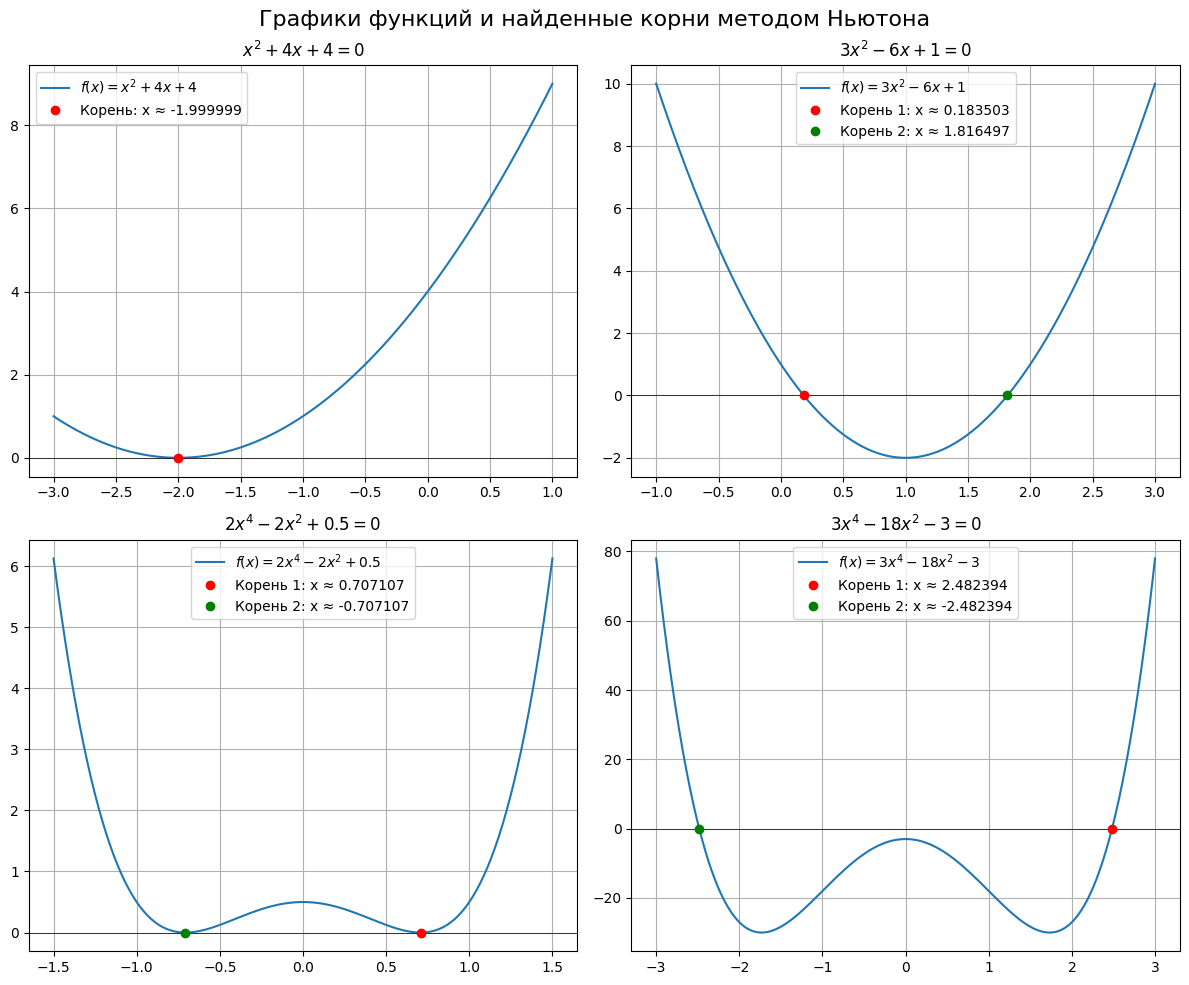

1. x² + 4x + 4 = 0
   Корень: x = -1.999999

2. 3x² - 6x + 1 = 0
   Корень 1: x = 0.183503
   Корень 2: x = 1.816497

3. 2x⁴ - 2x² + 0.5 = 0
   Корень 1: x = 0.707107
   Корень 2: x = -0.707107

4. 3x⁴ - 18x² - 3 = 0
   Корень 1: x = 2.482394
   Корень 2: x = -2.482394


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Графики функций и найденные корни методом Ньютона', fontsize=16)

# x^2 + 4x + 4 = 0
x_vals = np.linspace(-3, 1, 400)
f1 = lambda x: quadratic_equation(x, 1, 4, 4)
axs[0, 0].plot(x_vals, f1(x_vals), label='$f(x) = x^2 + 4x + 4$')
axs[0, 0].axhline(0, color='black', linewidth=0.5)
root1, _ = Newton_method(f1, x0=-1)
axs[0, 0].plot(root1, f1(root1), 'ro', label=f'Корень: x ≈ {root1:.6f}')
axs[0, 0].set_title('$x^2 + 4x + 4 = 0$')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 3x^2 - 6x + 1 = 0
x_vals = np.linspace(-1, 3, 400)
f2 = lambda x: quadratic_equation(x, 3, -6, 1)
axs[0, 1].plot(x_vals, f2(x_vals), label='$f(x) = 3x^2 - 6x + 1$')
axs[0, 1].axhline(0, color='black', linewidth=0.5)
root2_1, _ = Newton_method(f2, x0=0)
root2_2, _ = Newton_method(f2, x0=2)
axs[0, 1].plot(root2_1, f2(root2_1), 'ro', label=f'Корень 1: x ≈ {root2_1:.6f}')
axs[0, 1].plot(root2_2, f2(root2_2), 'go', label=f'Корень 2: x ≈ {root2_2:.6f}')
axs[0, 1].set_title('$3x^2 - 6x + 1 = 0$')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 2x^4 - 2x^2 + 0.5 = 0
x_vals = np.linspace(-1.5, 1.5, 400)
f3 = lambda x: biquadratic_equation(x, 2, -2, 0.5)
axs[1, 0].plot(x_vals, f3(x_vals), label='$f(x) = 2x^4 - 2x^2 + 0.5$')
axs[1, 0].axhline(0, color='black', linewidth=0.5)
root3_1, _ = Newton_method(f3, x0=0.5)
root3_2, _ = Newton_method(f3, x0=-0.5)
axs[1, 0].plot(root3_1, f3(root3_1), 'ro', label=f'Корень 1: x ≈ {root3_1:.6f}')
axs[1, 0].plot(root3_2, f3(root3_2), 'go', label=f'Корень 2: x ≈ {root3_2:.6f}')
axs[1, 0].set_title('$2x^4 - 2x^2 + 0.5 = 0$')
axs[1, 0].legend()
axs[1, 0].grid(True)

# 3x^4 - 18x^2 - 3 = 0
x_vals = np.linspace(-3, 3, 400)
f4 = lambda x: biquadratic_equation(x, 3, -18, -3)
axs[1, 1].plot(x_vals, f4(x_vals), label='$f(x) = 3x^4 - 18x^2 - 3$')
axs[1, 1].axhline(0, color='black', linewidth=0.5)
root4_1, _ = Newton_method(f4, x0=2.5)
root4_2, _ = Newton_method(f4, x0=-2.5)
axs[1, 1].plot(root4_1, f4(root4_1), 'ro', label=f'Корень 1: x ≈ {root4_1:.6f}')
axs[1, 1].plot(root4_2, f4(root4_2), 'go', label=f'Корень 2: x ≈ {root4_2:.6f}')
axs[1, 1].set_title('$3x^4 - 18x^2 - 3 = 0$')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

print(f"1. x² + 4x + 4 = 0")
print(f"   Корень: x = {root1:.6f}")
print()
print(f"2. 3x² - 6x + 1 = 0")
print(f"   Корень 1: x = {root2_1:.6f}")
print(f"   Корень 2: x = {root2_2:.6f}")
print()
print(f"3. 2x⁴ - 2x² + 0.5 = 0")
print(f"   Корень 1: x = {root3_1:.6f}")
print(f"   Корень 2: x = {root3_2:.6f}")
print()
print(f"4. 3x⁴ - 18x² - 3 = 0")
print(f"   Корень 1: x = {root4_1:.6f}")
print(f"   Корень 2: x = {root4_2:.6f}")

### Тригонометрические

Корень уравнения sin(x)=√3/2: -1.999999
Количество итераций: 22
Проверка: f1(-1.999999) = 5.115908e-13

Корень уравнения cos(2πx)+sin²(x)=1/9: 0.183503
Количество итераций: 4
Проверка: f2(0.183503) = 0.000000e+00


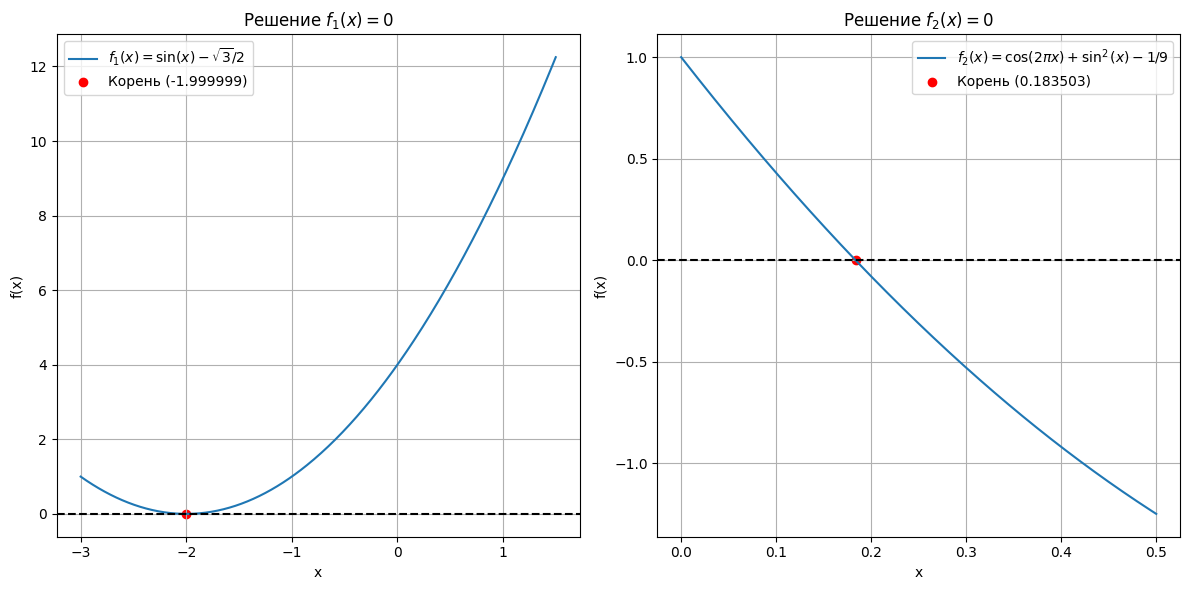

In [ ]:
# корни методом Ньютона
root1, iter1 = Newton_method(f1, x0=1.0)
root2, iter2 = Newton_method(f2, x0=0.25)

print(f"Корень уравнения sin(x)=√3/2: {root1:.6f}")
print(f"Количество итераций: {iter1}")
print(f"Проверка: f1({root1:.6f}) = {f1(root1):.6e}\n")

print(f"Корень уравнения cos(2πx)+sin²(x)=1/9: {root2:.6f}")
print(f"Количество итераций: {iter2}")
print(f"Проверка: f2({root2:.6f}) = {f2(root2):.6e}")

x1 = np.linspace(-3, 1.5, 400)
x2 = np.linspace(0, 0.5, 400)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x1, f1(x1), label='$f_1(x) = \sin(x) - \sqrt{3}/2$')
plt.axhline(0, color='black', linestyle='--')
plt.scatter(root1, 0, color='red', label=f'Корень ({root1:.6f})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Решение $f_1(x) = 0$')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x2, f2(x2), label='$f_2(x) = \cos(2\pi x) + \sin^2(x) - 1/9$')
plt.axhline(0, color='black', linestyle='--')
plt.scatter(root2, 0, color='red', label=f'Корень ({root2:.6f})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Решение $f_2(x) = 0$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Метод 3.2


In [ ]:
def modified_Newton_method(f, x0, tol=1e-6, max_iter=10000):

    # вычисляем производную в начальной точке один раз
    dx = 0.001
    f_prime_x0 = (f(x0 + dx) - f(x0 - dx)) / (2 * dx)
    
    if abs(f_prime_x0) < 1e-10:
        raise ValueError("Производная в начальной точке близка к нулю. Метод не может продолжаться.")
    
    x = x0
    for n in range(max_iter):
        x_new = x - f(x) / f_prime_x0
        
        if abs(x_new - x) < tol:  # проверка сходимости
            return x_new, n + 1
        
        x = x_new
    
    raise ValueError(f"Метод не сошелся после {max_iter} итераций")



### Линейные уравнения

Уравнение: 1x + 3 = 0
Корень: x = -3.000000, найдено за 2 итераций

Уравнение: 5x + -10 = 0
Корень: x = 2.000000, найдено за 2 итераций

Уравнение: -1x + 0 = 0
Корень: x = 0.000000, найдено за 1 итераций



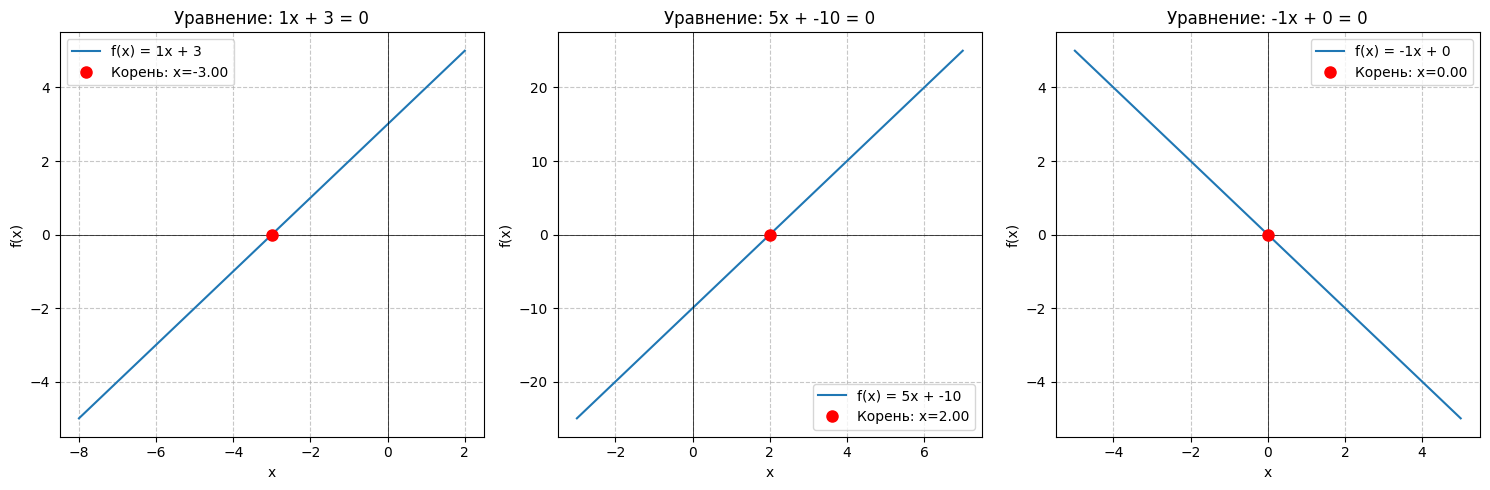

In [ ]:
"""
kx+b=0
(k=1,b=3)
(k=5,b=-10)
(k=-1,b=0)
"""
# решение уравнений и построение графиков
equations = [
    (1, 3),    # x + 3 = 0
    (5, -10),  # 5x - 10 = 0
    (-1, 0)    # -x = 0
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (k, b) in enumerate(equations):
    # Определяем функцию f(x) = k*x + b
    f = lambda x: line(k,x,b)
    
    # Начальное приближение
    x0 = 0.0
    
    try:
        root, iterations = modified_Newton_method(f, x0)
        
        x_vals = np.linspace(root-5, root+5, 400)
        y_vals = f(x_vals)
        
        ax = axes[idx]
        ax.plot(x_vals, y_vals, label=f'f(x) = {k}x + {b}')
        ax.axhline(0, color='black', linewidth=0.5)  # Ось X
        ax.axvline(0, color='black', linewidth=0.5)  # Ось Y
        ax.plot(root, 0, 'ro', markersize=8, label=f'Корень: x={root:.2f}')
        
        ax.set_title(f'Уравнение: {k}x + {b} = 0')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend()
        
        print(f"Уравнение: {k}x + {b} = 0")
        print(f"Корень: x = {root:.6f}, найдено за {iterations} итераций")
        print()
        
    except ValueError as e:
        print(f"Ошибка для уравнения {k}x + {b} = 0: {e}")
        print()

plt.tight_layout()
plt.show()

### Квадратичные и биквадратичные

Уравнение 1: x = -2.001412, достигнуто за 1407 итераций
Уравнение 2: x1 = 0.183503, x2 = 1.816497
Уравнение 3: x1 = 0.706608, x2 = -0.706608
Уравнение 4: x1 = 2.482394, x2 = -2.482394


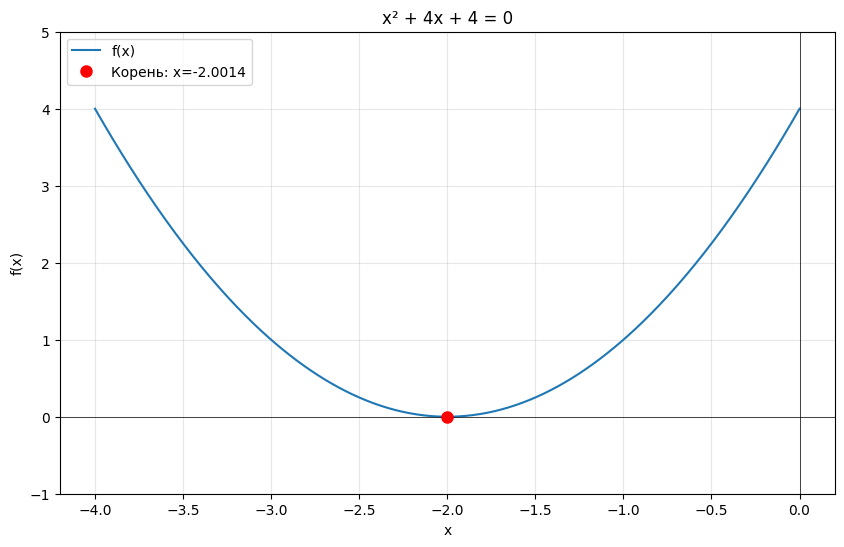

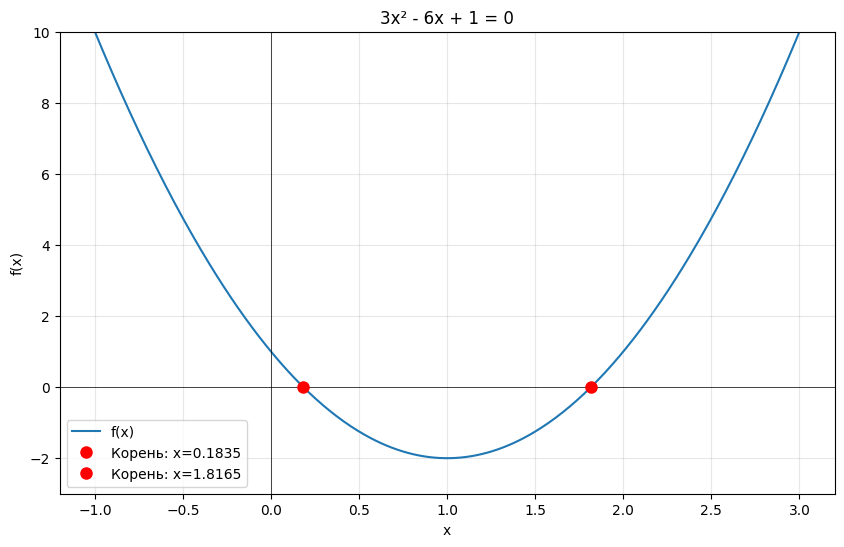

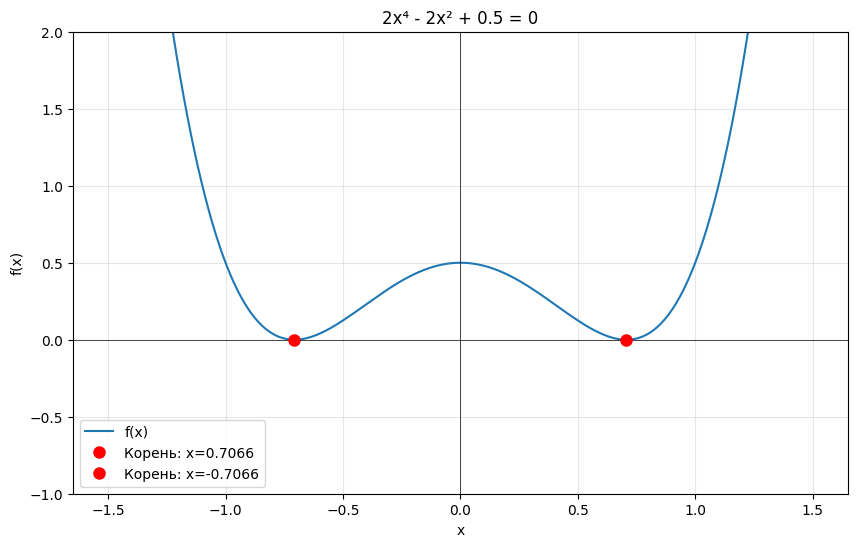

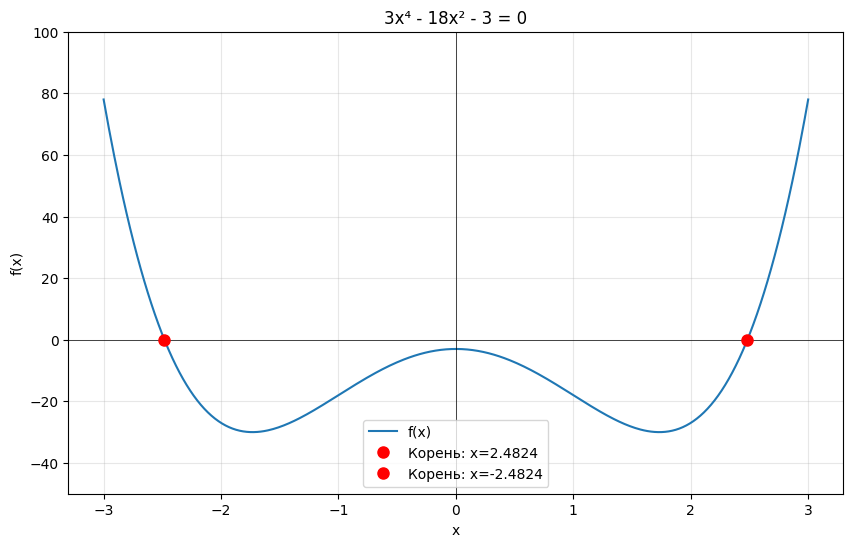

In [ ]:
# функции уравнений
f_1 = lambda x: quadratic_equation(x, 1, 4, 4)
f_2 = lambda x: quadratic_equation(x, 3, -6, 1)
f3 = lambda x: biquadratic_equation(x, 2, -2, 0.5)
f4 = lambda x: biquadratic_equation(x, 3, -18, -3)

# начальные приближения
x0_1 = -3
x0_2a, x0_2b = 0, 2
x0_3a, x0_3b = 0.5, -0.5
x0_4a, x0_4b = 2.5, -2.5

# решение уравнений
try:
    root1, iter1 = modified_Newton_method(f_1, x0_1)
    print(f"Уравнение 1: x = {root1:.6f}, достигнуто за {iter1} итераций")
except ValueError as e:
    print(f"Уравнение 1: {e}")

try:
    root2a, iter2a = modified_Newton_method(f_2, x0_2a)
    root2b, iter2b = modified_Newton_method(f_2, x0_2b)
    print(f"Уравнение 2: x1 = {root2a:.6f}, x2 = {root2b:.6f}")
except ValueError as e:
    print(f"Уравнение 2: {e}")

try:
    root3a, iter3a = modified_Newton_method(f3, x0_3a)
    root3b, iter3b = modified_Newton_method(f3, x0_3b)
    print(f"Уравнение 3: x1 = {root3a:.6f}, x2 = {root3b:.6f}")
except ValueError as e:
    print(f"Уравнение 3: {e}")

try:
    root4a, iter4a = modified_Newton_method(f4, x0_4a)
    root4b, iter4b = modified_Newton_method(f4, x0_4b)
    print(f"Уравнение 4: x1 = {root4a:.6f}, x2 = {root4b:.6f}")
except ValueError as e:
    print(f"Уравнение 4: {e}")


def plot_function_and_root(f, root, title, x_range, y_range=None):
    x = np.linspace(x_range[0], x_range[1], 400)
    y = f(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x)')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    
    # корни
    if isinstance(root, (list, tuple)):
        for r in root:
            plt.plot(r, f(r), 'ro', markersize=8, label=f'Корень: x={r:.4f}')
    else:
        plt.plot(root, f(root), 'ro', markersize=8, label=f'Корень: x={root:.4f}')
    
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    if y_range:
        plt.ylim(y_range)
    
    plt.show()

plot_function_and_root(f_1, root1, 'x² + 4x + 4 = 0', [-4, 0], [-1, 5])


plot_function_and_root(f_2, [root2a, root2b], '3x² - 6x + 1 = 0', [-1, 3], [-3, 10])


plot_function_and_root(f3, [root3a, root3b], '2x⁴ - 2x² + 0.5 = 0', [-1.5, 1.5], [-1, 2])


plot_function_and_root(f4, [root4a, root4b], '3x⁴ - 18x² - 3 = 0', [-3, 3], [-50, 100])

### Тригонометрические

Решения уравнения sin(x) = √3/2:
x = 1.047198 (найдено за 1 итераций)


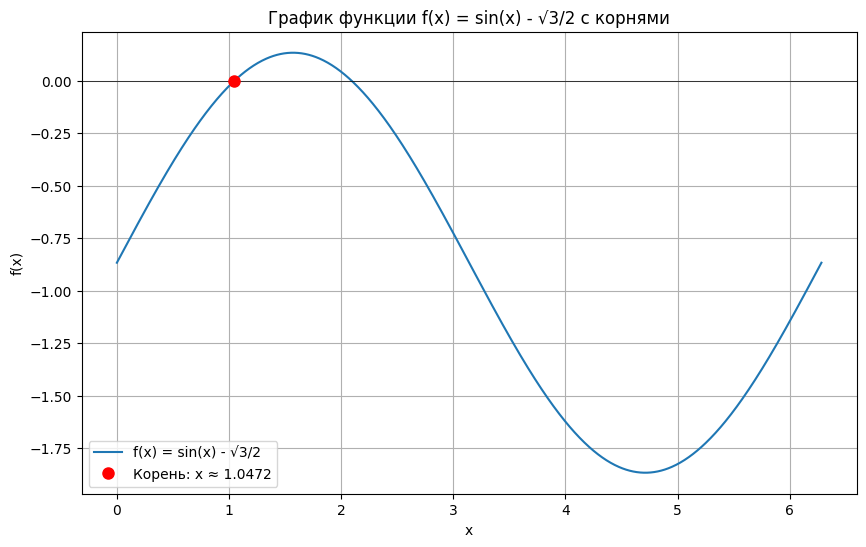


Решения уравнения cos(2x) = -sin²(x) + 1/9:
x = 2.319891 (найдено за 6 итераций)


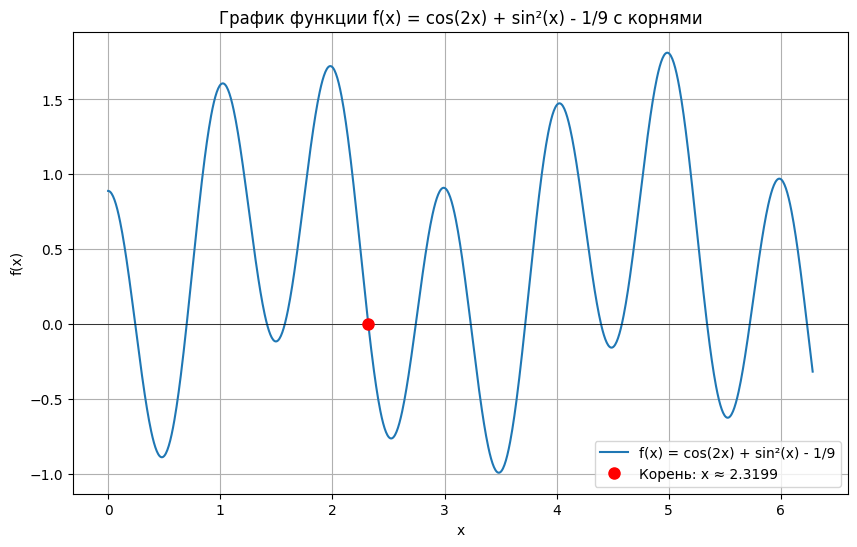

In [ ]:
import math
# Первое уравнение: sin(x) = √3/2
# def f1(x):
#     return math.sin(x) - math.sqrt(3)/2

# # Второе уравнение: cos(2x) = -sin²(x) + 1/9
# def f2(x):
#     return math.cos(2*x) + math.sin(x)**2 - 1/9

# они разные с предыдущей!
def plot_function_with_roots(f, equation_str, roots, x_range, title):
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    y_vals = [f(x) for x in x_vals]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label=f'f(x) = {equation_str}')
    plt.axhline(0, color='black', linewidth=0.5)
    
    # корни на графике
    for root, _ in roots:
        plt.plot(root, 0, 'ro', markersize=8, label=f'Корень: x ≈ {root:.4f}')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

# 1
roots1 = []
initial_guesses1 = [math.pi/3]
for x0 in initial_guesses1:
    try:
        root, iterations = modified_Newton_method(f1, x0)
        roots1.append((root, iterations))
    except ValueError as e:
        print(f"Ошибка для x0={x0:.3f}: {e}")

print("Решения уравнения sin(x) = √3/2:")
for root, iterations in roots1:
    print(f"x = {root:.6f} (найдено за {iterations} итераций)")

plot_function_with_roots(
    f1, 
    "sin(x) - √3/2", 
    roots1, 
    [0, 2*math.pi], 
    "График функции f(x) = sin(x) - √3/2 с корнями"
)

# 2
roots2 = []
initial_guesses2 = [3*math.pi/4]
for x0 in initial_guesses2:
    try:
        root, iterations = modified_Newton_method(f2, x0)
        roots2.append((root, iterations))
    except ValueError as e:
        print(f"Ошибка для x0={x0:.3f}: {e}")

print("\nРешения уравнения cos(2x) = -sin²(x) + 1/9:")
for root, iterations in roots2:
    print(f"x = {root:.6f} (найдено за {iterations} итераций)")

plot_function_with_roots(
    f2, 
    "cos(2x) + sin²(x) - 1/9", 
    roots2, 
    [0, 2*math.pi], 
    "График функции f(x) = cos(2x) + sin²(x) - 1/9 с корнями"
)

